In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/submission3csv/submission (1).csv
/kaggle/input/titanic-analysis/__results__.html
/kaggle/input/titanic-analysis/submission.csv
/kaggle/input/titanic-analysis/__notebook__.ipynb
/kaggle/input/titanic-analysis/__output__.json
/kaggle/input/titanic-analysis/custom.css
/kaggle/input/titanic-analysis/__results___files/__results___15_2.png


## Get the titanic dataset by using pandas
And print the shape and info of the dataset

In [2]:
titanic_data=pd.read_csv('/kaggle/input/titanic/train.csv')
print(titanic_data.shape,"\n",titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
(891, 12) 
 None


We got that
* It has 891 rows and 12 columns.
## Drop the columns which is not needed to find the survived column..

In [3]:
titanic_data.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],inplace=True)
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB
None


## Observation from the above info()
* Sex is the only object data so we need to change the data type
* We can get that Age has some null values
* So fill the null values by using median of age

In [4]:
titanic_data['Sex']=titanic_data['Sex'].astype('category')
titanic_data['Sex']=titanic_data['Sex'].cat.codes
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), int8(1)
memory usage: 35.8 KB
None


## sex has been changed to integer

In [5]:
titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace=True)
titanic_data['Age']=titanic_data['Age'].astype(int)
titanic_data.drop_duplicates(inplace=True)
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 0 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  507 non-null    int64
 1   Pclass    507 non-null    int64
 2   Sex       507 non-null    int8 
 3   Age       507 non-null    int64
 4   SibSp     507 non-null    int64
 5   Parch     507 non-null    int64
dtypes: int64(5), int8(1)
memory usage: 24.3 KB
None


In [6]:
titanic_data.skew()

Survived    0.067298
Pclass     -0.287245
Sex        -0.162749
Age         0.284607
SibSp       2.563225
Parch       2.008416
dtype: float64

In [7]:
titanic_data.SibSp=np.sqrt(titanic_data.SibSp)
titanic_data.Parch=np.sqrt(titanic_data.Parch)

In [8]:
titanic_data.Parch=titanic_data.Parch.astype(int)
titanic_data.SibSp=titanic_data.SibSp.astype(int)
titanic_data.drop_duplicates(inplace=True)

Survived    0.045893
Pclass     -0.233576
Sex        -0.188523
Age         0.245252
SibSp       0.733809
Parch       0.897854
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  481 non-null    int64
 1   Pclass    481 non-null    int64
 2   Sex       481 non-null    int8 
 3   Age       481 non-null    int64
 4   SibSp     481 non-null    int64
 5   Parch     481 non-null    int64
dtypes: int64(5), int8(1)
memory usage: 23.0 KB
None


<Figure size 432x288 with 0 Axes>

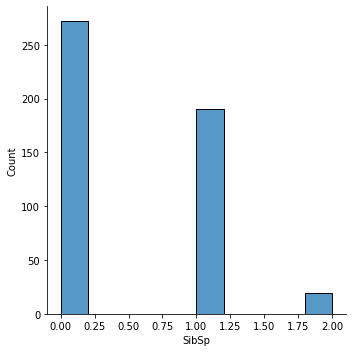

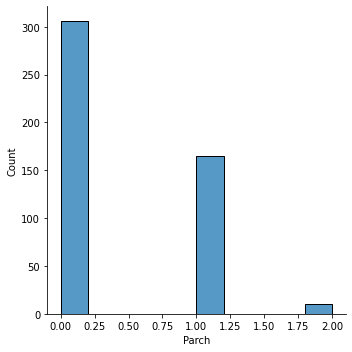

<AxesSubplot:>

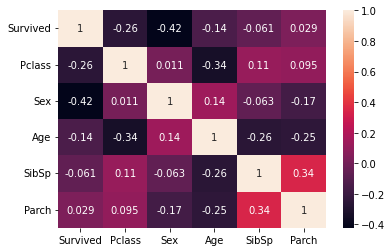

In [9]:
print(titanic_data.skew())
print(titanic_data.info())
plt.figure()
sns.displot(titanic_data['SibSp'])
plt.show()
sns.displot(titanic_data['Parch'])
plt.show()
sns.heatmap(titanic_data.corr(),annot=True)

In [10]:
x=titanic_data[['Pclass','Sex','Age','SibSp','Parch']]
y=pd.DataFrame(titanic_data['Survived'],columns=['Survived'])
print(x.info(),y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 889
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  481 non-null    int64
 1   Sex     481 non-null    int8 
 2   Age     481 non-null    int64
 3   SibSp   481 non-null    int64
 4   Parch   481 non-null    int64
dtypes: int64(4), int8(1)
memory usage: 19.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 889
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  481 non-null    int64
dtypes: int64(1)
memory usage: 7.5 KB
None None


## Importing the required models

In [11]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [12]:
x_train,x_test,y_train,y_test=tts(x,y,train_size=0.7)
predictor=LogisticRegression()
predictor.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
prediction=predictor.predict(x_test)
print(accuracy_score(prediction,y_test))

0.7310344827586207


In [14]:
print(confusion_matrix(prediction,y_test))

[[54 15]
 [24 52]]


In [15]:
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [16]:
test_data.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],inplace=True)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 16.5+ KB
None


In [17]:
test_data.Age.fillna(test_data.Age.median(),inplace=True)
test_data.Age=test_data.Age.astype(int)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pclass  418 non-null    int64 
 1   Sex     418 non-null    object
 2   Age     418 non-null    int64 
 3   SibSp   418 non-null    int64 
 4   Parch   418 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.5+ KB
None


In [18]:
test_data.Sex=test_data.Sex.astype('category')
test_data.Sex=test_data.Sex.cat.codes
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  418 non-null    int64
 1   Sex     418 non-null    int8 
 2   Age     418 non-null    int64
 3   SibSp   418 non-null    int64
 4   Parch   418 non-null    int64
dtypes: int64(4), int8(1)
memory usage: 13.6 KB
None


In [19]:
print(test_data.skew())

Pclass   -0.534170
Sex      -0.568991
Age       0.651015
SibSp     4.168337
Parch     4.654462
dtype: float64


In [20]:
test_data.SibSp=np.sqrt(test_data.SibSp)
test_data.Parch=np.sqrt(test_data.SibSp)
test_data.Parch=test_data.Parch.astype(int)
test_data.SibSp=test_data.SibSp.astype(int)
print(test_data.info())
print(test_data.skew())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  418 non-null    int64
 1   Sex     418 non-null    int8 
 2   Age     418 non-null    int64
 3   SibSp   418 non-null    int64
 4   Parch   418 non-null    int64
dtypes: int64(4), int8(1)
memory usage: 13.6 KB
None
Pclass   -0.534170
Sex      -0.568991
Age       0.651015
SibSp     1.060004
Parch     0.759914
dtype: float64


In [21]:
final_result=predictor.predict(test_data)
final_result=pd.DataFrame(final_result,columns=['Survived'])
print(final_result.head(10))

   Survived
0         0
1         0
2         0
3         0
4         1
5         0
6         1
7         0
8         1
9         0


In [22]:
final_submission=pd.read_csv('/kaggle/input/titanic/test.csv')
final_submission=pd.DataFrame(final_submission.PassengerId,columns=['PassengerId'])
print(final_submission.isnull().sum())
print(final_submission.shape,final_result.shape)
final_submission=pd.concat([final_submission,final_result],axis='columns')
print(final_submission.info())
print(final_submission)

PassengerId    0
dtype: int64
(418, 1) (418, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [23]:
final_submission.to_csv('submission.csv',index=False)